In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')
%matplotlib inline

In [186]:
df = pd.read_csv('transaction_data.csv')

In [187]:
df.head(10)

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
5,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
6,345954,6162981,Fri Sep 28 10:51:00 IST 2018,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,United Kingdom
7,-1,6143225,Mon Sep 10 11:58:00 IST 2018,447867,SKULLS WRITING SET,120,1.15,United Kingdom
8,339822,6255403,Mon Dec 10 09:23:00 IST 2018,1783845,MULTI COLOUR SILVER T-LIGHT HOLDER,36,1.18,United Kingdom
9,328440,6387425,Sat Feb 16 10:35:00 IST 2019,494802,SET OF 6 RIBBONS PERFECTLY PRETTY,36,3.99,United Kingdom


### To Do Data Cleaning:
    - Extract Day, Month, Date, Time, Year from TransactionTime column.
    - Refill NaN values of ItemDescription with other same ItemCode's ItemDescription 
    - Add total_amount column using CostPerItem * NumberOfItemsPurchased

In [188]:
df.describe().round(2)

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1083818.00,1083818.00,1083818.00,1083818.00,1083818.00
mean,241016.22,6159416.64,658268.70,28.66,9.50
std,142336.43,147634.09,452631.43,654.24,2308.14
min,-1.00,5900015.00,-1.00,-242985.00,-15265.64
25%,259392.00,6026856.00,460908.00,3.00,1.73
50%,302022.00,6166611.00,475293.00,9.00,2.88
75%,341355.00,6289569.00,488943.00,30.00,5.70
max,384027.00,6397457.00,1894494.00,242985.00,1696285.44


In [189]:
df.isna().sum().sort_values(ascending=False)

ItemDescription           2908
Country                      0
CostPerItem                  0
NumberOfItemsPurchased       0
ItemCode                     0
TransactionTime              0
TransactionId                0
UserId                       0
dtype: int64

In [190]:
"""Extract Day, Month, Date, Hour and Year from TransactionTime column"""

df['Day'] = df['TransactionTime'].str[:3]    #Extract Day
df['Month'] = df['TransactionTime'].str[3:7]    #Extract Month
df['Date'] = df['TransactionTime'].str[7:10].astype('int16')    #Extract Date
df['Hour'] = df['TransactionTime'].str[10:13].astype('int16')    #Extract Hour
df['Year'] =  df['TransactionTime'].str[-4:].astype('int16')    #Extract Year

In [191]:
"""Now, We've extracted all important entities from TransactionTime column so we can safely delete it"""

df = df.drop('TransactionTime', axis=1)

In [192]:
"""Add amount_spent column by NumberOfItemsPurchased * CostPerItem"""

df['AmountSpent'] = df['NumberOfItemsPurchased'] * df['CostPerItem']

In [195]:
"""
Dataset has 2908 NaN values of ItemDescription. We have to find ItemCode for Null values and search in dataset.
if ItemDescription has value with same ItemCode we will replace it with NaN. Otherwise NaN value will be stored as it is.
"""

for i in df.index:
    if pd.isnull(df.at[i, 'ItemDescription']):
        code = df.at[i, 'ItemCode']
        for j in df.index:
            if df.at[j, 'ItemCode'] == code and pd.isnull(df.at[j, 'ItemDescription']) == False:
                df.at[i,'ItemDescription'] = df.at[j, 'ItemDescription']
                break

In [1]:
"""Above task is computationally expensive so, after this computation we will save dataframe to csv and open again"""


df.to_csv('edited_transaction_data.csv', index=False)

NameError: name 'df' is not defined

In [6]:
df2 = pd.read_csv('edited_transaction_data.csv')

In [7]:
df2.head(10)

,UserId,TransactionId,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Month,Date,Hour,Year,AmountSpent
0,278166,6355745,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,Sat,Feb,2,12,2019,70.38
1,337701,6283376,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,Wed,Dec,26,9,2018,10.56
2,267099,6385599,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,Fri,Feb,15,9,2019,64.80
3,380478,6044973,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,Fri,Jun,22,7,2018,5.19
4,-1,6143225,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,Mon,Sep,10,11,2018,10.20
5,285957,6307136,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,Fri,Jan,11,9,2019,42.24
6,345954,6162981,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,United Kingdom,Fri,Sep,28,10,2018,61.56
7,-1,6143225,447867,SKULLS WRITING SET,120,1.15,United Kingdom,Mon,Sep,10,11,2018,138.00
8,339822,6255403,1783845,MULTI COLOUR SILVER T-LIGHT HOLDER,36,1.18,United Kingdom,Mon,Dec,10,9,2018,42.48
9,328440,6387425,494802,SET OF 6 RIBBONS PERFECTLY PRETTY,36,3.99,United Kingdom,Sat,Feb,16,10,2019,143.64


### Exploratory Data Analysis

    - How many orders per hour?
    - How many orders per Day?
    - How many orders per Month?
    - Orders per each country?
    - How much money spent by each country?
    - How many orders per user?
    - Top 10 user by money spent.
    - Top 10 Items sold by quantity.

In [8]:
#how many order per hour
orders_per_hour = df2.groupby('Hour').count()['NumberOfItemsPurchased'].sort_values(ascending=False)
orders_per_hour

Hour
8     157418
11    155038
9     144518
10    134942
7     115348
12    109032
6      98074
5      68664
13     57018
4      17818
14     15948
15      7410
16      1742
3        766
2         82
Name: NumberOfItemsPurchased, dtype: int64

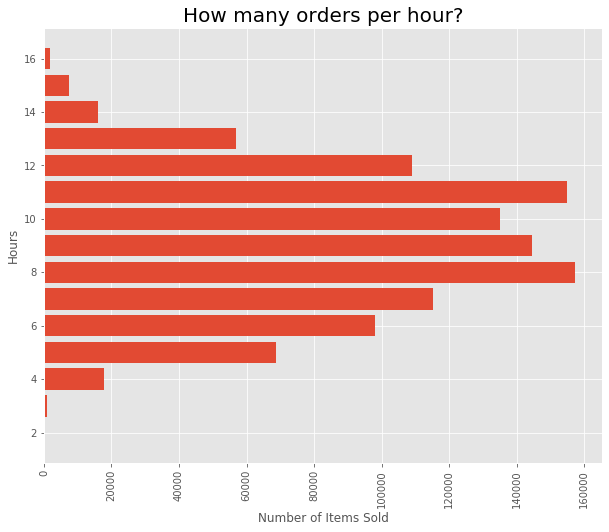

In [9]:
plt.figure(figsize=(10, 8))

plt.barh(orders_per_hour.index, orders_per_hour)
plt.title("How many orders per hour?", fontsize=20)
plt.xlabel('Number of Items Sold')
plt.ylabel('Hours')
plt.xticks(rotation=90)
plt.show()

In [10]:
#How many order per Day
orders_per_day = df2.groupby('Day')
orders_per_day.count()['NumberOfItemsPurchased'].sort_values()

Day
Fri    134676
Wed    164386
Mon    189130
Sat    190222
Sun    197690
Tue    207714
Name: NumberOfItemsPurchased, dtype: int64

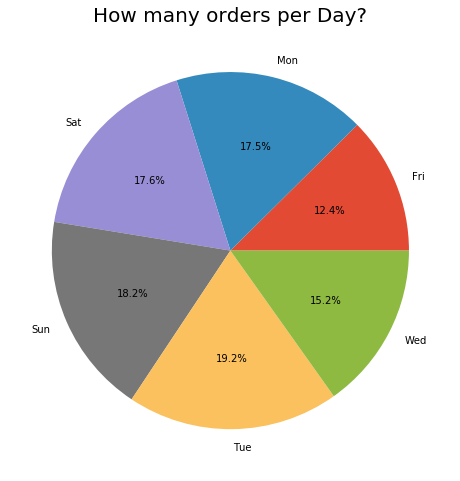

In [11]:
plt.figure(figsize=(8, 10))
days = [days for days, group in orders_per_day]
plt.pie(orders_per_day.count()['NumberOfItemsPurchased'], labels=days, autopct='%1.1f%%')
plt.title("How many orders per Day?", fontsize=20)
plt.show()

In [12]:
#How many orders per Month?
orders_per_month = df2.groupby('Month').count()['NumberOfItemsPurchased'].sort_values()
orders_per_month

Month
 Mar     48384
 Apr     61866
 May     65390
 Jul     69618
 Aug     69682
 Oct     72118
 Jun     75158
 Sep     77108
 Nov     79060
 Dec    123486
 Jan    147424
 Feb    194524
Name: NumberOfItemsPurchased, dtype: int64

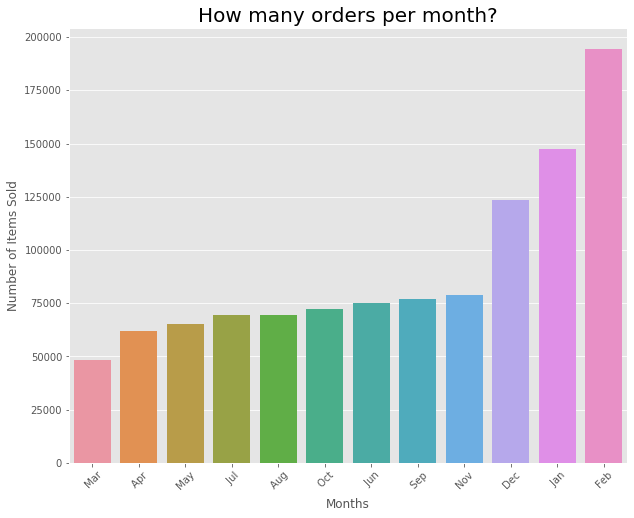

In [13]:
plt.figure(figsize=(10, 8))

sns.barplot(orders_per_month.index, orders_per_month)
plt.title("How many orders per month?", fontsize=20)
plt.xlabel('Months')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)
plt.show()

In [14]:
#Orders per each country?
orders_per_each_country =  df2.groupby('Country').count()['TransactionId'].sort_values()
orders_per_each_country

Country
Saudi Arabia                20
Bahrain                     38
Czech Republic              60
Brazil                      64
Lithuania                   70
Lebanon                     90
RSA                        116
European Community         122
United Arab Emirates       136
Malta                      254
Greece                     292
Canada                     302
Iceland                    364
Singapore                  458
Hong Kong                  576
USA                        582
Israel                     594
Poland                     682
Japan                      716
Denmark                    778
Austria                    802
Unspecified                892
Sweden                     924
Cyprus                    1244
Finland                   1390
Channel Islands           1516
Italy                     1606
Norway                    2172
Australia                 2518
Portugal                  3038
Switzerland               4004
Belgium                   4138


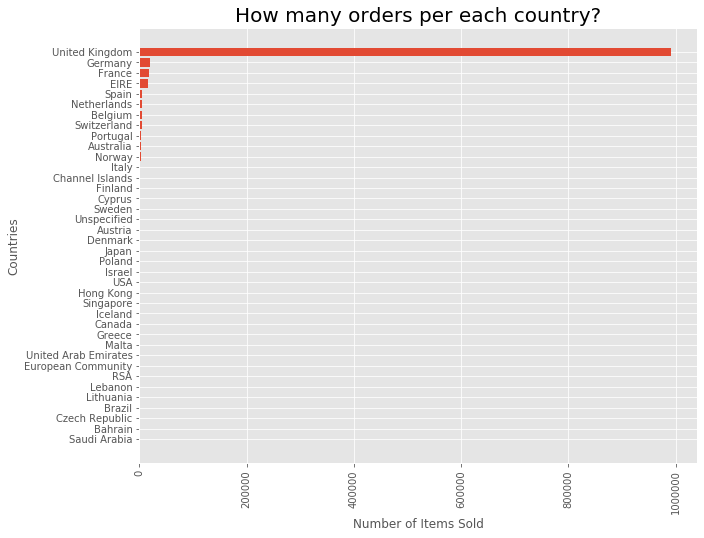

In [15]:
plt.figure(figsize=(10, 8))

plt.barh(orders_per_each_country.index, orders_per_each_country)
plt.title("How many orders per each country?", fontsize=20)
plt.xlabel('Number of Items Sold')
plt.ylabel('Countries')
plt.xticks(rotation=90)
plt.show()

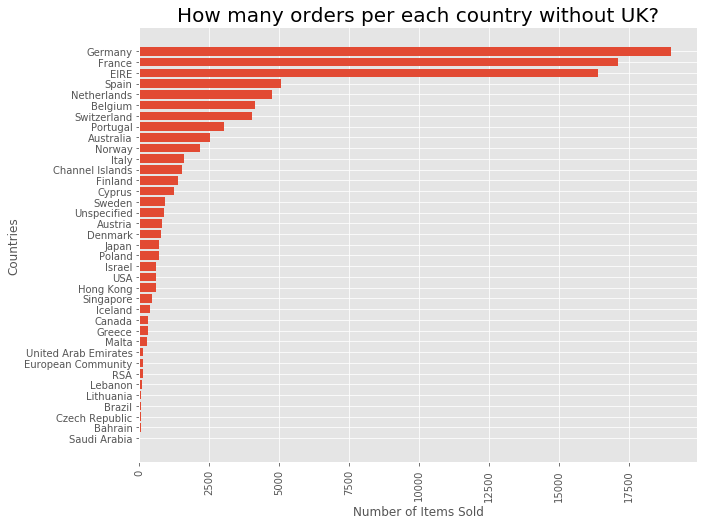

In [16]:
#Seems like United Kingdom is dominated other countries in terms of orders, let's plot withou UK.

orders_per_each_country_without_uk = orders_per_each_country


del orders_per_each_country_without_uk['United Kingdom']


plt.figure(figsize=(10, 8))
plt.barh(orders_per_each_country_without_uk.index, orders_per_each_country_without_uk)
plt.title("How many orders per each country without UK?", fontsize=20)
plt.xlabel('Number of Items Sold')
plt.ylabel('Countries')
plt.xticks(rotation=90)
plt.show()

In [17]:
#How much money spent by each country?
money_spent_by_each_country = df2.groupby('Country')['AmountSpent'].sum().sort_values(ascending=False)
money_spent_by_each_country

Country
United Kingdom          1.493493e+08
Netherlands             2.363390e+06
EIRE                    2.184310e+06
Germany                 1.839183e+06
France                  1.637831e+06
Australia               1.137606e+06
Switzerland             4.677334e+05
Spain                   4.543739e+05
Belgium                 3.393437e+05
Sweden                  3.038714e+05
Japan                   2.934085e+05
Norway                  2.917334e+05
Portugal                2.436628e+05
Finland                 1.851981e+05
Channel Islands         1.666073e+05
Denmark                 1.556387e+05
Italy                   1.401125e+05
Cyprus                  1.073663e+05
Austria                 8.421366e+04
Hong Kong               8.391852e+04
Singapore               7.567632e+04
Israel                  6.561864e+04
Poland                  5.984100e+04
Unspecified             3.940458e+04
Greece                  3.905556e+04
Iceland                 3.575940e+04
Canada                  3.0425

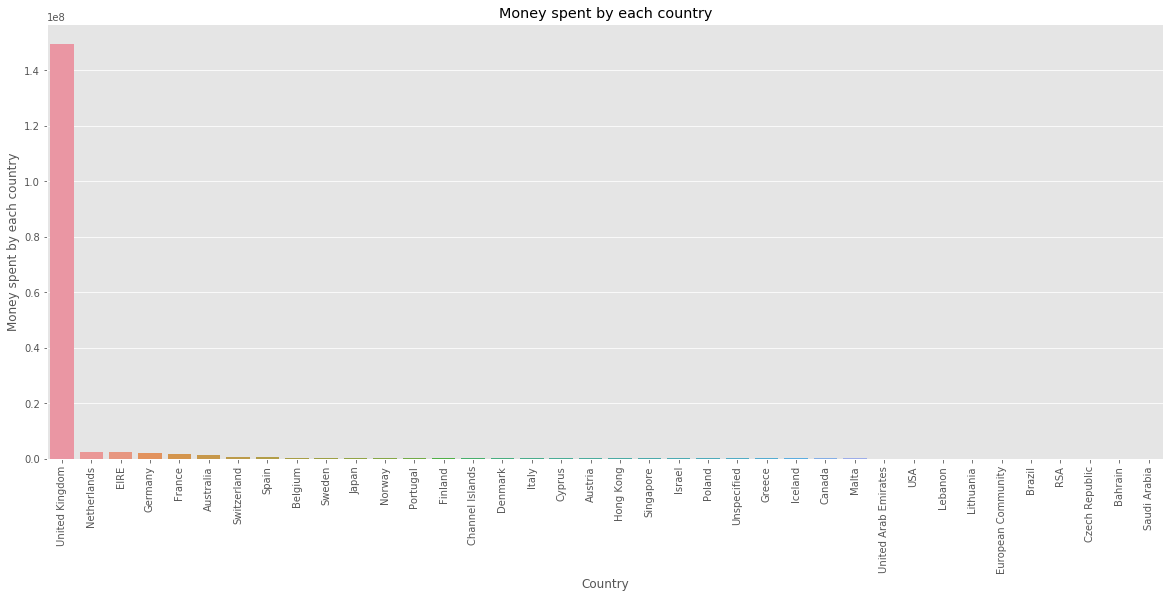

In [18]:
plt.figure(figsize=(20, 8))

sns.barplot(money_spent_by_each_country.index, money_spent_by_each_country)
plt.title("Money spent by each country")
plt.xlabel('Country')
plt.ylabel('Money spent by each country')
plt.xticks(rotation=90)
plt.show()

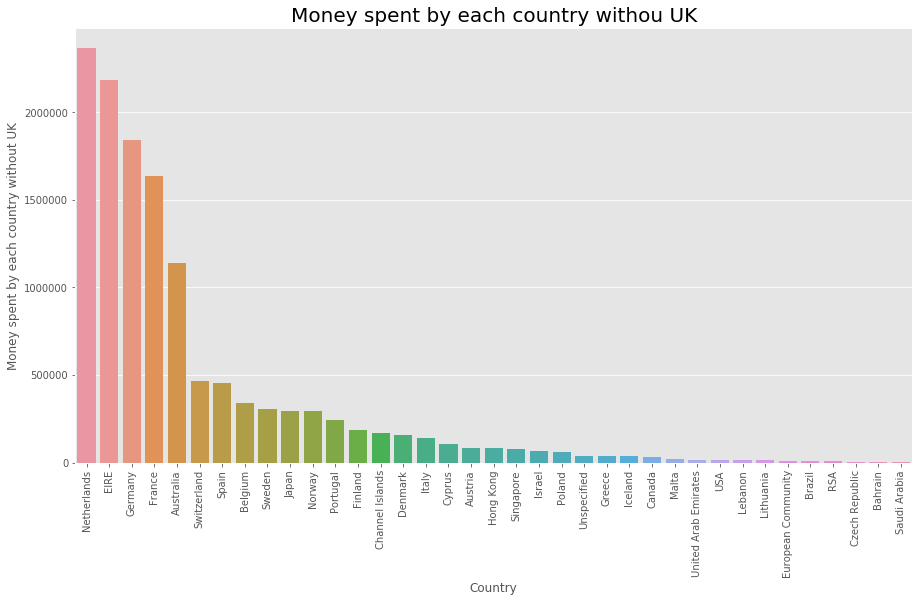

In [19]:
money_spent_by_each_country_without_uk = money_spent_by_each_country

del money_spent_by_each_country_without_uk['United Kingdom']


plt.figure(figsize=(15, 8))
sns.barplot(money_spent_by_each_country_without_uk.index, money_spent_by_each_country_without_uk)
plt.title("Money spent by each country withou UK", fontsize=20)
plt.xlabel('Country')
plt.ylabel('Money spent by each country without UK')
plt.xticks(rotation=90)
plt.show()

In [20]:
#top 10 users by money spent
money_spent_by_top10_users = df2.groupby('UserId').count()['AmountSpent'].sort_values(ascending=False)[:10]
money_spent_by_top10_users

UserId
-1         270160
 374661     15966
 313131     11806
 296016     10256
 267708      9284
 306726      5564
 321531      4982
 307566      4170
 274869      3714
 278523      3354
Name: AmountSpent, dtype: int64

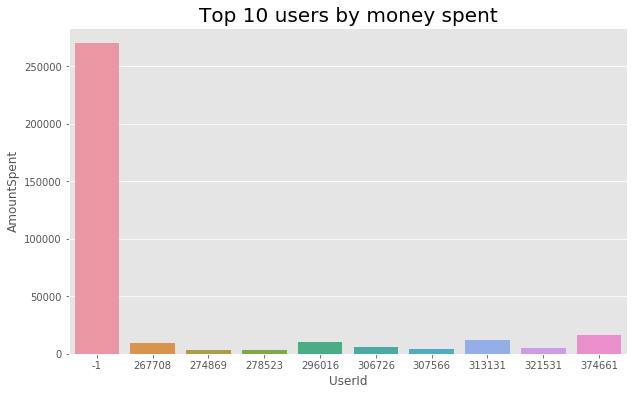

In [21]:
plt.figure(figsize=(10, 6))

users = money_spent_by_top10_users.index
sns.barplot(users, money_spent_by_top10_users)
plt.title("Top 10 users by money spent", fontsize=20)
plt.show()

In [22]:
# # #top 10 items sold by quantity
top_10_items_sold = df2.groupby('ItemDescription').count()['NumberOfItemsPurchased']
top_10_items_sold

In [23]:
plt.figure(figsize=(10, 8))

plt.barh(top_10_items_sold.index, top_10_items_sold)
plt.xlabel('Quantity sold')
plt.ylabel('Items')
plt.title("Top 10 items sold by quantity", fontsize=20)
plt.show()

In [24]:
"""
Even after replacing NaN values with other ItemDescription we have left with 182 NaN values. 
We can now discuss and do the needful for this NaN values.
"""

df2.isna().sum()

UserId                      0
TransactionId               0
ItemCode                    0
ItemDescription           182
NumberOfItemsPurchased      0
CostPerItem                 0
Country                     0
Day                         0
Month                       0
Date                        0
Hour                        0
Year                        0
AmountSpent                 0
dtype: int64

### Free Items?

In [25]:
df_free = df2[df2['CostPerItem'] == 0]

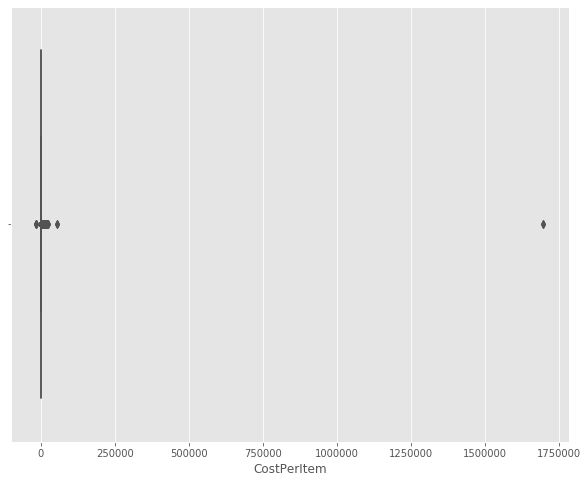

In [26]:
plt.figure(figsize=(10,8))

sns.boxplot(df2['CostPerItem'])
plt.show()

In [27]:
df_free['Month'].value_counts()

 Feb    678
 Jun    636
 Jan    552
 Jul    540
 Dec    428
 May    354
 Sep    348
 Aug    318
 Nov    314
 Oct    314
 Apr    276
 Mar    272
Name: Month, dtype: int64

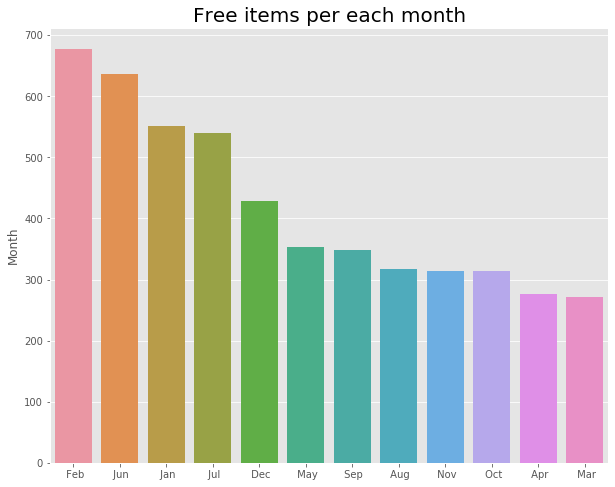

In [28]:
plt.figure(figsize=(10, 8))

sns.barplot(df_free['Month'].value_counts().index,
           df_free['Month'].value_counts())
plt.title("Free items per each month", fontsize=20)
plt.show()

### Negative Quantity of items?
    - This is not possible of negative quantity, this must be data insertion problem.

In [29]:
df_negative_quantity = df2[df2["NumberOfItemsPurchased"] < 0]

In [30]:
df_negative_quantity['UserId'].value_counts()[:20]

-1         3438
 313131     452
 374661     272
 367731     226
 321531     224
 264747     202
 302610     186
 289758     180
 306726     164
 275373     158
 261891     142
 308280     124
 260715     124
 261912     104
 266889      98
 267708      92
 284214      92
 352821      90
 274449      90
 315105      82
Name: UserId, dtype: int64

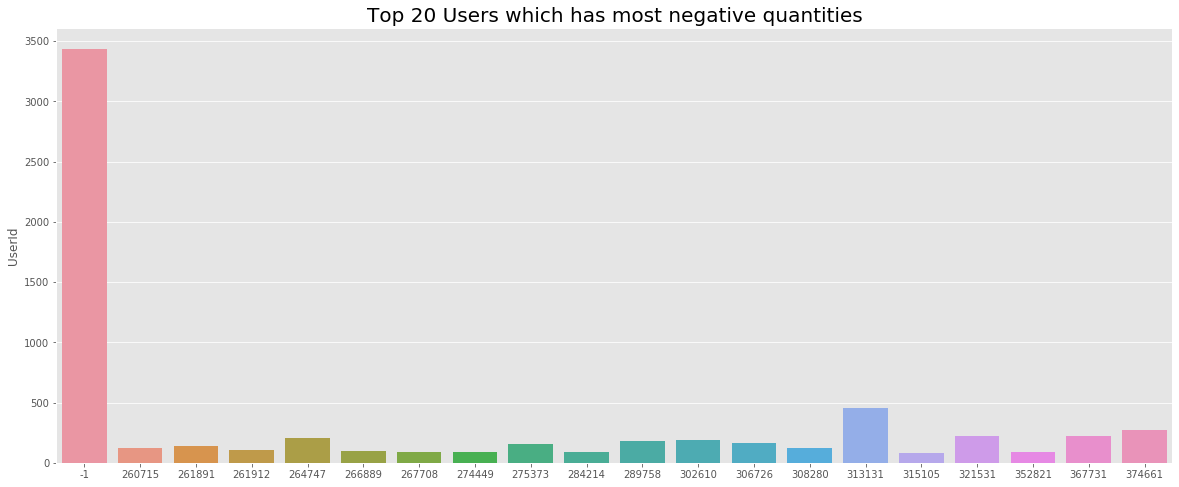

In [31]:
plt.figure(figsize=(20,8))

sns.barplot(df_negative_quantity['UserId'].value_counts().index[:20], 
        df_negative_quantity['UserId'].value_counts()[:20])
plt.title("Top 20 Users which has most negative quantities", fontsize=20)
plt.show()

## Market Basket Analysis

In [32]:
from mlxtend.frequent_patterns import apriori, association_rules

In [33]:
df3 = df2.copy()

In [34]:
#remove white spaces in ItemDescription
df3['ItemDescription'] = df3['ItemDescription'].str.strip()

In [35]:
#as we have seen above some Items has negative quantity, we will drop them for analysis.
df3 = df3[df3['NumberOfItemsPurchased'] > 0]

In [36]:
basket = pd.pivot_table(
    data=df3,
    index='TransactionId',
    columns='ItemCode',
    values='NumberOfItemsPurchased',
    aggfunc='sum',
    fill_value=0
)

In [37]:
basket.head(10)

ItemCode,-1,42,63,84,1449,1470,1596,2310,2520,2730,...,1894242,1894284,1894305,1894326,1894368,1894389,1894410,1894431,1894452,1894494
TransactionId,,,,,,,,,,,,,,,,,,,,,
5900015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900070,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5900103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
def convert_to_binary(x):
    """
        We don't need quantity sum, we just need item is either taken or not.
        So we will convert it into binary format.
    """
    if x > 0:
        return 1
    else:
        return 0
    
    
baskets = basket.applymap(convert_to_binary)

In [39]:
frequent_items = apriori(baskets, min_support=0.03, use_colnames=True)

In [40]:
frequent_items

,support,itemsets
0,0.103773,(-1)
1,0.037679,(316176)
2,0.033626,(434385)
3,0.041635,(434952)
4,0.032082,(434973)
...,...,...
132,0.030538,"(476658, 476637)"
133,0.037051,"(476637, 476679)"
134,0.030876,"(477267, 477246)"
135,0.031793,"(487179, 1787079)"


In [41]:
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('support', ascending=False)

,antecedents,consequents,support,confidence,lift
17,(1787079),(470106),0.046266,0.360662,6.137767
16,(470106),(1787079),0.046266,0.787356,6.137767
15,(1787079),(460551),0.041827,0.326062,5.708296
14,(460551),(1787079),0.041827,0.732264,5.708296
19,(1787079),(470631),0.040139,0.312900,5.519815
18,(470631),(1787079),0.040139,0.708085,5.519815
23,(476679),(476637),0.037051,0.720450,14.712801
22,(476637),(476679),0.037051,0.756650,14.712801
28,(1787079),(487263),0.033771,0.263257,4.429211
29,(487263),(1787079),0.033771,0.568182,4.429211
